# **ESTRUTURA DO PROJETO**

---



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**PASSO 1 - Importar as bibliotecas necessárias**

---



In [16]:
import os
import pandas as pd
import seaborn as sns
from IPython.display import HTML
import plotly.express as px
import numpy as np

sns.set()

**PASSO 2 - Percorrer todos os arquivos (planilhas) existentes dentro de uma pasta no Google Drive**

In [4]:
lista_planilha = os.listdir('/content/drive/MyDrive/ciencia de dados')
display(lista_planilha)

['Devolucoes+-+Belo+Horizonte.csv',
 'Devolucoes+-+Curitiba.csv',
 'Devolucoes+-+Fortaleza.csv',
 'Devolucoes+-+Goiás.csv',
 'Devolucoes+-+Porto+Alegre.csv',
 'Devolucoes+-+Recife.csv',
 'Devolucoes+-+Rio+de+Janeiro.csv',
 'Devolucoes+-+Salvador.csv',
 'Devolucoes+-+São+Paulo.csv',
 'Vendas+-+Belo+Horizonte.csv',
 'Vendas+-+Curitiba.csv',
 'Vendas+-+Fortaleza.csv',
 'Vendas+-+Goiás.csv',
 'Vendas+-+Porto+Alegre.csv',
 'Vendas+-+Recife.csv',
 'Vendas+-+Rio+de+Janeiro.csv',
 'Vendas+-+Salvador.csv',
 'Vendas+-+São+Paulo.csv']

**PASSO 3 - Importar todos os arquivos (planilhas) de vendas e unificá-las numa única tabela (DataFrame) no Pandas**

In [5]:
total_vendas = pd.DataFrame()

for planilha in lista_planilha:
  if 'Vendas' in planilha:
    tabela = pd.read_csv(f'/content/drive/MyDrive/ciencia de dados/{planilha}')
    total_vendas = pd.concat([total_vendas, tabela])

display(total_vendas)

,Unnamed: 0,SKU,Produto,Quantidade,Primeiro Nome,Sobrenome,Data,Loja,Valor Unitário,Unnamed: 8
0,17,HL4379,Televisão,2,Carolina,Alfradique,2/25/2023,Belo Horizonte,2500,NaN
1,25,HL4379,Televisão,1,Danilo,Rubim,2/20/2023,Belo Horizonte,2500,NaN
2,27,HL1918,iPhone,5,Bernard,Pedrosa,7/7/2023,Belo Horizonte,5300,NaN
3,54,HL1918,iPhone,5,Lucas,Lemos,12/26/2023,Belo Horizonte,5300,NaN
4,67,HL8851,Notebook,5,Bernardo,Botelho,6/8/2023,Belo Horizonte,3500,NaN
...,...,...,...,...,...,...,...,...,...,...
2221,9981,HL7348,SmartWatch,4,Joío,Junior,4/14/2023,São Paulo,1400,NaN
2222,9984,HL1918,iPhone,4,Itai,Puntel,5/2/2023,São Paulo,5300,NaN
2223,9985,HL1918,iPhone,1,Guilherme,Vianna,3/18/2023,São Paulo,5300,NaN
2224,9991,HL7348,SmartWatch,5,Antônio,Soares,11/21/2023,São Paulo,1400,NaN


**PASSO 4 - Importar todos os arquivos (planilhas) de devoluções e unificá-las numa única tabela (DataFrame) no Pandas**

In [6]:
total_devolucoes = pd.DataFrame()

for devolucao in lista_planilha:
  if 'Devolucoes' in devolucao:
    tabela = pd.read_csv(f'/content/drive/MyDrive/ciencia de dados/{devolucao}')
    total_devolucoes = pd.concat([total_devolucoes, tabela])

display(total_devolucoes)

,Unnamed: 0,SKU,Produto,Quantidade,Data,Loja,Valor Unitário,Unnamed: 6
0,3,HL1918,iPhone,3,10/31/2023,Belo Horizonte,5300,NaN
1,6,HL7348,SmartWatch,1,2/6/2023,Belo Horizonte,1400,NaN
2,20,HL7348,SmartWatch,3,10/5/2023,Belo Horizonte,1400,NaN
3,21,HL9962,Android,1,5/26/2023,Belo Horizonte,3400,NaN
4,23,HL2714,Tablet,1,4/24/2023,Belo Horizonte,1600,NaN
...,...,...,...,...,...,...,...,...
97,477,HL4379,Televisão,5,4/5/2023,São Paulo,2500,NaN
98,478,HL8851,Notebook,1,10/27/2023,São Paulo,3500,NaN
99,486,HL7348,SmartWatch,5,4/13/2023,São Paulo,1400,NaN
100,487,HL2714,Tablet,2,9/7/2023,São Paulo,1600,NaN


# **INDICADORES**

**1.0 - QUANTIDADE DE VENDAS LÍQUIDAS:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais vendas.

In [7]:
quantidade_produto_vl = total_vendas[['SKU', 'Produto', 'Quantidade']].groupby(['SKU', 'Produto']).sum().sort_values(by='Quantidade', ascending=False)
quantidade_loja_vl = total_vendas[['Loja', 'Quantidade']].groupby(['Loja']).sum().sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Quantidade de vendas líquidas por produto: </h2>'))
display(quantidade_produto_vl.head(3))

display(HTML('<br><hr></br>'))

display(HTML('<h2>Quantidade de vendas líquidas por Loja: </h2>'))
display(quantidade_loja_vl.head(3))

,,Quantidade
SKU,Produto,
HL1918,iPhone,8974
HL4379,Televisão,5931
HL8851,Notebook,3249


,Quantidade
Loja,
São Paulo,6674
Rio de Janeiro,4393
Fortaleza,4320


In [8]:
# gráfico de pizza ou torta

grafico1 = px.pie(quantidade_produto_vl.reset_index(), names='Produto', values='Quantidade', title='Quantidade de vendas liquidas por produto')
grafico1.update_traces(textposition='inside', textinfo='label+percent')
grafico1.update_layout(height=500, width=1000)
grafico1.show()

# gráfico de barras
grafico2 = px.bar(quantidade_loja_vl.reset_index(), x='Loja', y='Quantidade', title='Quantidade de vendas liquidas por Loja', color='Quantidade')
grafico2.update_layout(height=500, width=1000)
grafico2.show()

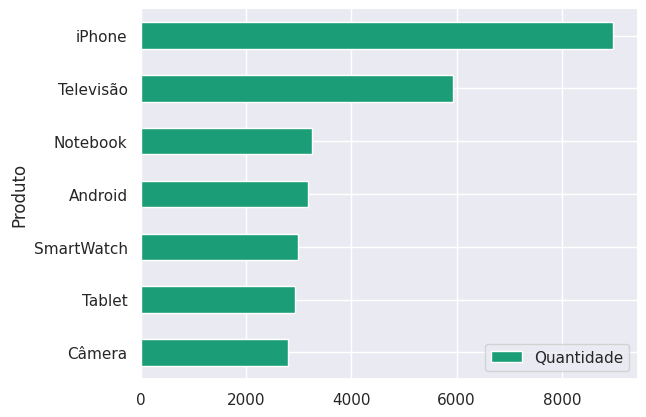

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

quantidade_vendida = total_vendas[['SKU', 'Produto', 'Quantidade']].groupby(['Produto']).sum(numeric_only=True).sort_values(by='Quantidade', ascending=True)
quantidade_vendida.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**1.1 - QUANTIDADE DE VENDAS BRUTAS:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais vendas.

In [10]:
quantidade_produto_vb = pd.DataFrame(pd.concat([total_vendas, total_devolucoes])).groupby(['SKU', 'Produto'])[['Quantidade']].sum().sort_values(by='Quantidade', ascending=False)
quantidade_loja_vb = pd.DataFrame(pd.concat([total_vendas, total_devolucoes])).groupby(['Loja'])[['Quantidade']].sum().sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Quantidade de vendas bruta por Produto: </h2>'))
display(quantidade_produto_vb.head(3))

display(HTML('<br><hr></br>'))

display(HTML('<h2>Quantidade de vendas bruta por loja: </h2>'))
display(quantidade_loja_vb.head(3))

,,Quantidade
SKU,Produto,
HL1918,iPhone,9144
HL4379,Televisão,6078
HL8851,Notebook,3423


,Quantidade
Loja,
São Paulo,6974
Rio de Janeiro,4614
Fortaleza,4591


In [11]:
# Gráfico de barras

grafico3 = px.bar(
    quantidade_produto_vb.reset_index(),
    x='Produto',
    y="Quantidade",
    title='Quantidades de vendas brutas por produto',
    color='Produto',
)
grafico3.update_xaxes(categoryorder='total descending')
grafico3.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0.7)',
    font_color='white'
    )

grafico3.show()

# gráfico de barras
grafico4 = px.bar(quantidade_loja_vb.reset_index(),
                  x='Loja', y='Quantidade',
                  title='Quantidade de vendas brutas por Loja',
                  color='Loja')
grafico4.update_layout(height=500, width=1000)
grafico4.update_xaxes(categoryorder='total descending')

grafico4.update_layout(
    xaxis={
        'tickfont': {
            'color': 'blue',
            'size': 14,
        },
        'title': {
            'text': 'Lojas',
            'font': {
                'color': 'orange',
                'size': 18,

            }
        }
    },
    yaxis={
        'tickfont': {
            'color': 'red',
            'size': 14,
        },
        'title': {
            'text': 'Quantidades de produtos',
            'font': {
            'color': 'orange',
            'size': 18,
    },
        }}
    )

grafico4.show()

**1.2 - QUANTIDADE DE DEVOLUÇÕES:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais devoluções.

In [12]:
quantidade_produto_d = total_devolucoes[['SKU', 'Produto', 'Quantidade']].groupby(['Produto']).sum().sort_values(by='Quantidade', ascending=False)
quantidade_loja_d = total_devolucoes[['Loja', 'Quantidade']].groupby('Loja').sum().sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Produtos com mais devoluções: </h2>'))
display(quantidade_produto_d.head(3))

display(HTML('<br><hr></br>'))

display(HTML('<h2>Lojas com mais devoluções: </h2>'))
display(quantidade_loja_d.head(3))

<ipython-input-12-401de490d3b6>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Quantidade
Produto,
SmartWatch,395
Tablet,301
Android,187


,Quantidade
Loja,
São Paulo,300
Fortaleza,271
Rio de Janeiro,221


,Categoria,Quantidade,Tipo
SmartWatch,SmartWatch,395,Produto
Tablet,Tablet,301,Produto
Android,Android,187,Produto
Notebook,Notebook,174,Produto
iPhone,iPhone,170,Produto
Televisão,Televisão,147,Produto
Câmera,Câmera,143,Produto
São Paulo,São Paulo,300,Loja
Fortaleza,Fortaleza,271,Loja
Rio de Janeiro,Rio de Janeiro,221,Loja


Text(0, 0.5, 'Quantidades')

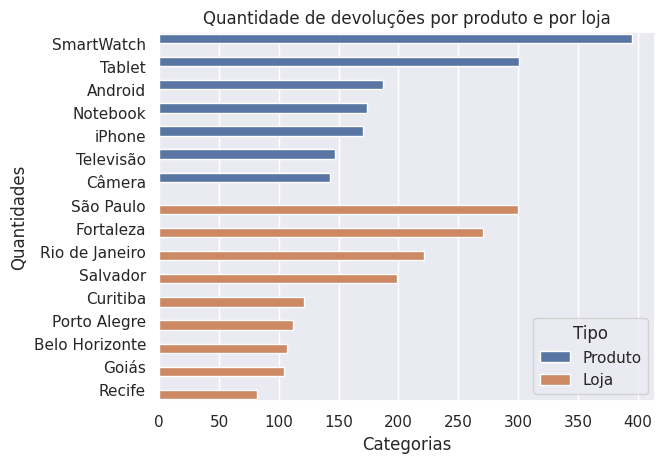

In [13]:
# Criar dataframes para o grafico

quantidade_produto_d_grafico = pd.DataFrame(
    {
        'Categoria':quantidade_produto_d.index,
        'Quantidade':quantidade_produto_d['Quantidade'],
        'Tipo': ['Produto'] * len(quantidade_produto_d),

    }
)

quantidade_loja_d_grafico = pd.DataFrame(
    {
        'Categoria':quantidade_loja_d.index,
        'Quantidade':quantidade_loja_d['Quantidade'],
        'Tipo': ['Loja'] * len(quantidade_loja_d),
    }
)

# concatenando os dataframes
df_concatenado = pd.concat([quantidade_produto_d_grafico,quantidade_loja_d_grafico])

display(df_concatenado)

# plotando grafico de barras horizontais

grafico5 = sns.barplot(df_concatenado, x='Quantidade', y='Categoria', hue='Tipo', orient='h')
grafico5.set_title('Quantidade de devoluções por produto e por loja')
grafico5.set_xlabel('Categorias')
grafico5.set_ylabel('Quantidades')

**2.0 - ANÁLISE DE SAZONALIDADE:**

**Objetivo:** Calcular a variação das vendas dos produtos por mês.

In [14]:
data_formatada =pd.to_datetime(total_vendas['Data'], format='%m/%d/%Y')
vendas_mensais = pd.DataFrame(
    {
        'Data': data_formatada,
        'Quantidade': total_vendas['Quantidade'],
    }
)

vendas_mensais = vendas_mensais.set_index('Data').resample('M').sum()
vendas_mensais.index = vendas_mensais.index.strftime('%b/%Y')
vendas_mensais['Variacao'] = vendas_mensais['Quantidade'].diff()

display(HTML('<h2>Variação da quantidade de produtos vendidos por mês: </h2>'))
display(vendas_mensais)

,Quantidade,Variacao
Data,,
Jan/2023,2553,NaN
Feb/2023,2508,-45.0
Mar/2023,2538,30.0
Apr/2023,2366,-172.0
May/2023,2357,-9.0
Jun/2023,2584,227.0
Jul/2023,2666,82.0
Aug/2023,2400,-266.0
Sep/2023,2446,46.0


In [30]:
# grafico de linha
text_color = np.where(vendas_mensais['Variacao'] < 0, 'red', 'blue')

grafico6 = px.line(vendas_mensais.reset_index(), x ='Data', y ='Quantidade', title="Vendas Mensais x Sazonalidade", markers=True, text=vendas_mensais['Quantidade'])
grafico6.update_traces(textposition='top center', textfont=dict(color=text_color, size=15), marker=dict(color=text_color))
grafico6.show()

**2.1 - ANÁLISE DE FATURAMENTO TRIMESTRAL:**

**Objetivo:** Calcular o faturamento trimestral do ano.

In [15]:
faturamento_trimestral = pd.DataFrame(
    {
        'Data': data_formatada,
        'Quantidade': total_vendas['Quantidade'],
        'Valor Unitário': total_vendas['Valor Unitário'],
        'Faturamento': total_vendas['Quantidade'] * total_vendas['Valor Unitário']
    }
)

faturamento_trimestral['Trimestre'] = faturamento_trimestral['Data'].dt.to_period('Q')

faturamento_trimestral = faturamento_trimestral.groupby('Trimestre')[['Faturamento']].sum()

faturamento_trimestral['Variacao'] = faturamento_trimestral['Faturamento'].diff()

display(HTML('<h2>Faturamento Trimestral: </h2>'))

# exemplos de valores possíveis para o to_period
# 'D'  para dias
# 'M' para meses
# 'Y' para anos
# 'Q' para trimestres
# 'W' para semanas

display(faturamento_trimestral)

,Faturamento,Variacao
Trimestre,,
2023Q1,25038900,NaN
2023Q2,24163700,-875200.0
2023Q3,24970600,806900.0
2023Q4,25146300,175700.0


In [38]:
# grafico de area
faturamento_trimestral.index = faturamento_trimestral.index.astype(str)

text_color1 = np.where(faturamento_trimestral['Faturamento'].diff() < 0, 'red', 'blue')

grafico7 = px.area(
    faturamento_trimestral.reset_index(),
    x='Trimestre',
    y='Faturamento',
    title='Faturamento Trimestral',
    markers=True)

grafico7.update_traces(fillcolor='rgba(27,239,143,0.2)', line_color='rgba(27,239,143,1)', marker=dict(color=text_color1))

grafico7.show()